In [57]:
!pip install deepchecks -q

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94)
clf = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

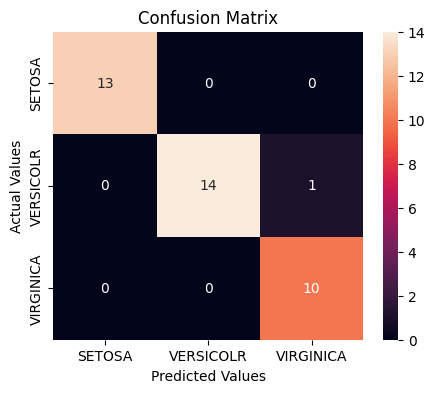

In [60]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [61]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94)

clf = xgb.XGBRegressor(tree_method="hist")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred = [round(value,1) for value in y_pred]
pd.DataFrame(list(zip(y_test, y_pred)), columns=['test', 'prediction'])

,test,prediction
0,7.2,8.400000
1,28.7,24.200001
2,19.8,22.299999
3,22.0,26.700001
4,13.5,20.100000
...,...,...
122,29.8,23.400000
123,22.6,23.100000
124,22.0,20.100000
125,46.7,45.799999


In [62]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),2)

0.88

In [63]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import full_suite, data_integrity
from deepchecks.tabular.checks import LabelDrift


x_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['target'])], axis=1)
x_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['target'])], axis=1)
ds_train = Dataset(x_train, label='target', cat_features=[])
ds_test =  Dataset(x_test,  label='target', cat_features=[])
suite = full_suite()
suite_result = suite.run(train_dataset=ds_train, test_dataset=ds_test, model=clf)

In [64]:
suite_result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

In [65]:
numeric_data = pd.DataFrame(X).select_dtypes(include=[np.number])
categorical_data = pd.DataFrame(X).select_dtypes(exclude=[np.number])

In [66]:
numeric_data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [67]:
categorical_data.columns

RangeIndex(start=0, stop=0, step=1)

In [68]:
import pickle
file_name = "xgb_reg.pkl"
pickle.dump(clf, open(file_name, "wb"))
xgb_model_loaded = pickle.load(open(file_name, "rb"))
xgb_model_loaded.predict(X_test)

array([ 8.413855 , 24.204956 , 22.263939 , 26.711107 , 20.145529 ,
       25.718359 , 25.231167 , 19.95037  , 24.244028 , 19.961138 ,
        8.358894 , 25.104702 , 26.079956 , 22.972574 , 24.609762 ,
       27.050411 , 18.903957 , 20.171745 , 20.238438 ,  7.877542 ,
       33.252937 , 15.4804735, 17.293076 , 24.36715  , 21.474457 ,
       46.87896  , 20.929577 , 18.87553  , 23.667255 , 17.200008 ,
       22.908022 , 25.201262 , 11.701574 , 37.01735  , 30.78962  ,
        6.4516807, 19.874617 , 12.851337 , 15.397414 , 47.45438  ,
       18.265682 , 35.600094 , 34.94031  , 17.180147 , 18.182959 ,
       32.407543 , 22.986181 , 27.41887  , 18.128168 , 25.289896 ,
       21.452599 , 20.767178 , 22.056824 , 23.855146 , 15.002597 ,
       17.240437 , 30.88285  , 33.16071  , 32.55288  , 27.67373  ,
       14.5967655, 23.27548  , 21.443945 , 11.291368 , 17.058971 ,
       11.0947695, 20.74183  , 33.99079  , 21.859003 , 20.059809 ,
       27.586935 , 15.368933 , 10.576184 , 14.116024 ,  8.2909